In [1]:
# 타자/경기별 기록 데이터를 불러오겠습니다. 
import pandas as pd

file  = './data/KBO_2019_player_gamestats.csv'
raw = pd.read_csv(file, encoding = 'cp949')
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


- 상대 팀별 기록 정리하기

In [2]:
# unique() 를 통해, 상대 컬럼에 어떠한 값이 들어있는지 살펴보겠습니다. 
raw['상대'].unique()

array(['한화', '키움', '@삼성', 'KT', 'NC', '@롯데', '@LG', 'SK', '@KIA', '@키움',
       '롯데', '@한화', 'LG', 'KIA', '@NC', '삼성', '@SK', '@KT', '두산', '@두산'],
      dtype=object)

In [3]:
# '상대' 컬럼에서   @가 붙어있는 경우에는 원정경기 / 없으면 홈 경기를 의미합니다. 
# '상대' 컬럼에서 홈/원정 여부,  상대팀을 분리하여 각각 '홈어웨이', '상대팀' 컬럼으로 저장하겠습니다. 
opp_list = [ ]
home_away_list = [ ]

for opp in raw['상대']:
    if "@" in opp:
        home_away = '원정'
        opp = opp.replace('@', '')
    else:
        home_away = '홈'
    home_away_list.append(home_away)
    opp_list.append(opp)

raw['홈어웨이'] = home_away_list
raw['상대팀'] = opp_list
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,타율,출루,장타,OPS,투구,avLI,RE24,WPA,홈어웨이,상대팀
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,홈,한화
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,홈,한화
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,홈,키움
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,홈,키움
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,홈,키움


In [6]:
# 상대 팀별 실적을 정리하기 위해 피벗 테이블을 만들겠습니다. 
# 상대팀별 실적 정리
factors = ['타수','안타','홈런', '루타', '타점','볼넷', '사구', '희비']
data = raw.pivot_table(index = ['팀','이름','생일', '상대팀'],
                      values = factors,
                       
                       
                      aggfunc = 'sum')
data.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         상대팀                                
KIA 고영창 1989-02-24 LG    0   0   0   0   0   0   0   0
    김선빈 1989-12-18 KT    5   1   0   4  33   4   0   0
                   LG   15   5   0  12  47   6   0   0
                   NC   14   8   0  14  42   2   0   0
                   SK   10   6   0  10  36   4   0   1

In [5]:
# 상대팀별 타수가 0보다 큰 경우의 데이터만 선택하겠습니다. 
cond = data['타수'] > 0 
data = data[ cond ]
data.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         상대팀                                
KIA 김선빈 1989-12-18 KT    5   1   0   4  33   4   0   0
                   LG   15   5   0  12  47   6   0   0
                   NC   14   8   0  14  42   2   0   0
                   SK   10   6   0  10  36   4   0   1
                   두산   20   3   0  15  54   5   0   0

In [6]:
# reset_index()를 이용해 인덱스로 지정되어있는 팀/이름/생일 을 컬럼으로 변경하겠습니다. 
data = data.reset_index()
data.head()

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,KT,5,1,0,4,33,4,0,0
1,KIA,김선빈,1989-12-18,LG,15,5,0,12,47,6,0,0
2,KIA,김선빈,1989-12-18,NC,14,8,0,14,42,2,0,0
3,KIA,김선빈,1989-12-18,SK,10,6,0,10,36,4,0,1
4,KIA,김선빈,1989-12-18,두산,20,3,0,15,54,5,0,0


In [7]:
# 타자 주요 실적을 계산하는 함수입니다. 
def cal_hit(df):
    '''
    - 타율 : 공을 쳐서 나가는 비율 --> 안타 / 타수
    - 출루율: 진루해서 나가는 비율 -->  (안타+볼넷+몸에맞는볼)/(타수+볼넷+몸에맞는볼+희생플라이)
    - 장타율 : 타율에 진루한 베이스 가중치 추가 -->   루타 / 타수
    '''
    
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['사구'] + df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    return df

In [8]:
# 타자/상대팀별 실적을 계산하겠습니다. 
player_stats_opp = cal_hit(data)
player_stats_opp

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,KT,5,1,0,4,33,4,0,0,0.121212,0.151515,0.151515,0.303030
1,KIA,김선빈,1989-12-18,LG,15,5,0,12,47,6,0,0,0.255319,0.361702,0.319149,0.680851
2,KIA,김선빈,1989-12-18,NC,14,8,0,14,42,2,0,0,0.333333,0.523810,0.333333,0.857143
3,KIA,김선빈,1989-12-18,SK,10,6,0,10,36,4,0,1,0.277778,0.432432,0.277778,0.710210
4,KIA,김선빈,1989-12-18,두산,20,3,0,15,54,5,0,0,0.277778,0.333333,0.370370,0.703704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,한화,호잉,1989-05-18,SK,20,2,1,15,55,7,1,0,0.272727,0.321429,0.363636,0.685065
1664,한화,호잉,1989-05-18,두산,30,11,0,18,54,5,2,0,0.333333,0.537037,0.555556,1.092593
1665,한화,호잉,1989-05-18,롯데,18,2,1,11,43,6,1,0,0.255814,0.318182,0.418605,0.736786
1666,한화,호잉,1989-05-18,삼성,20,3,1,12,51,8,2,1,0.235294,0.301887,0.392157,0.694044


### XXX 팀 킬러?

In [9]:
# 특정팀을 상대로 강한 타자를 살펴보겠습니다. 
## 먼저, '두산' 팀을 상대로 타수가 10 타수보다 많은 선수중 출루율 상위 10명을 찾아보겠습니다. 
team = '두산'
cond = (player_stats_opp['상대팀'] == team) & (player_stats_opp['타수'] > 10)
player_stats_opp[cond].sort_values(by = '출루율', ascending = False).head(10)

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
22,KIA,나지완,1985-05-19,두산,11,7,0,5,17,4,1,1,0.294118,0.666667,0.647059,1.313725
190,KT,강백호,1999-07-29,두산,18,10,0,14,42,8,1,0,0.333333,0.571429,0.428571,1.000000
538,NC,나성범,1989-10-03,두산,9,1,1,5,12,2,1,0,0.416667,0.538462,0.750000,1.288462
1664,한화,호잉,1989-05-18,두산,30,11,0,18,54,5,2,0,0.333333,0.537037,0.555556,1.092593
564,NC,박민우,1993-02-06,두산,25,5,1,20,49,7,0,0,0.408163,0.520000,0.510204,1.030204
145,KIA,터커,1990-07-06,두산,16,7,0,9,31,2,1,0,0.290323,0.516129,0.516129,1.032258
573,NC,박석민,1985-06-22,두산,20,7,0,12,37,13,2,0,0.324324,0.513514,0.540541,1.054054
1591,한화,이성열,1984-07-13,두산,30,8,1,20,54,15,1,2,0.370370,0.508772,0.555556,1.064327
1423,키움,샌즈,1987-09-28,두산,39,13,1,23,73,18,2,0,0.315068,0.500000,0.534247,1.034247
239,KT,박경수,1984-03-31,두산,14,6,1,12,37,9,0,0,0.324324,0.500000,0.378378,0.878378


In [10]:
# 이번에는 롯데를 상대로 타수가 20 타수보다 큰 타자중, 출루율 상위 10명을 살펴보겠습니다. 
team = '롯데'
cond = (player_stats_opp['상대팀'] == team) & (player_stats_opp['타수'] > 20)
player_stats_opp[cond].sort_values(by = '출루율', ascending = False).head(10)

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
330,KT,황재균,1987-07-28,롯데,35,11,0,22,47,12,3,1,0.468085,0.687500,0.744681,1.432181
610,NC,양의지,1987-06-05,롯데,29,7,2,20,42,8,2,0,0.476190,0.659091,0.690476,1.349567
1195,삼성,김상수,1990-03-23,롯데,23,13,2,17,49,5,1,0,0.346939,0.627451,0.469388,1.096839
1433,키움,서건창,1989-08-22,롯데,26,3,0,21,39,7,0,0,0.538462,0.615385,0.666667,1.282051
1225,삼성,러프,1986-07-28,롯데,28,16,1,13,51,15,3,1,0.254902,0.566038,0.549020,1.115057
287,KT,유한준,1981-07-01,롯데,30,11,0,21,56,10,2,1,0.375000,0.561404,0.535714,1.097118
410,LG,이천웅,1988-10-20,롯데,33,10,0,24,61,5,1,0,0.393443,0.557377,0.540984,1.098361
5,KIA,김선빈,1989-12-18,롯데,10,6,0,9,25,3,0,2,0.360000,0.555556,0.400000,0.955556
574,NC,박석민,1985-06-22,롯데,39,12,1,18,54,19,5,1,0.333333,0.553571,0.722222,1.275794
1461,키움,이지영,1986-02-27,롯데,16,2,0,15,31,6,0,0,0.483871,0.548387,0.516129,1.064516


In [12]:
# KBO  전체 팀을 대상으로 팀별 출루율 상위 5인 타자를 살펴보겠습니다. 

hitter_df = pd.DataFrame()

for team in player_stats_opp['상대팀'].unique():
    print(team)
    cond = (player_stats_opp['상대팀'] == team) & (player_stats_opp['타수'] > 20)
    df = player_stats_opp[cond].sort_values(by = '출루율', ascending = False).head(5)
    hitter_df = hitter_df.append(df)
                             
    

KT
LG
NC
SK
두산
롯데
삼성
키움
한화
KIA


In [13]:
# 특정팀 상대 출루율 Top5 이내 들어있는 타자 리스트는 아래와 같습니다
# unique() 명령을 이용해 복수의 팀을 대상으로 top5 에 들어있을 경우 한번만 나타나게 되어있습니다(중복제거)
hitter_df['이름'].unique()

array(['김헌곤', '박병호', '이형종', '최형우', '한동민', '정근우', '김하성', '터커', '박건우',
       '김재호', '민병헌', '박승욱', '최재훈', '강백호', '오재일', '장영석', '윌슨', '양의지',
       '이원재', '호잉', '박민우', '박석민', '황재균', '김상수', '서건창', '러프', '김혜성', '최정',
       '안치홍', '노수광', '샌즈', '최주환', '오지환'], dtype=object)

In [14]:
# 특정팀 상대 출루율 top5 이내 상위타자들을 대상으로  팀별 출루율 피벗테이블을 만들어보겠습니다. 
cond = player_stats_opp['이름'].isin(hitter_df['이름'].unique())
top_df = player_stats_opp[cond]
top_pivot = top_df.pivot_table(index = ['팀','이름'], values = '출루율', columns = '상대팀', aggfunc = 'sum')
top_pivot

상대팀           KIA        KT        LG        NC        SK        두산        롯데  \
팀   이름                                                                          
KIA 안치홍       NaN  0.306122  0.521739  0.384615  0.333333  0.350000  0.500000   
    최형우       NaN  0.540000  0.478261  0.433962  0.457627  0.431373  0.490196   
    터커        NaN  0.400000  0.594595  0.279070  0.628571  0.516129  0.319149   
KT  강백호  0.470588       NaN  0.338983  0.551020  0.444444  0.571429  0.430769   
    박승욱  0.210526       NaN  0.222222  0.636364  0.466667  0.239130  0.307692   
    황재균  0.333333       NaN  0.454545  0.365385  0.240741  0.365854  0.687500   
LG  오지환  0.576923  0.446429       NaN  0.415094  0.250000  0.442308  0.228070   
    이형종  0.479167  0.550000       NaN  0.304348  0.293103  0.319149  0.396552   
NC  박민우  0.529412  0.365385  0.397059       NaN  0.362069  0.520000  0.421053   
    박석민  0.342105  0.500000  0.416667       NaN  0.444444  0.513514  0.553571   
    양의지  0.720930  0.354167  0.396552       NaN  0.509804  0.444444  0.659091   
    이원재  0.407407  0.357143  0.250000       NaN  0.500000  0.222222  0.200000   
SK  노수광  0.326923  0.370370  0.428571  0.307692       NaN  0.220000  0.527273   
    최정   0.543860  0.457627  0.432836  0.440678       NaN  0.382979  0.388060   
    한동민  0.333333  0.538462  0.423077  0.500000       NaN  0.410714  0.408163   
두산  김재호  0.444444  0.486486  0.568182  0.341463  0.341463       NaN  0.387755   
    박건우  0.297872  0.531915  0.574468  0.519231  0.480000       NaN  0.407407   
    오재일  0.408163  0.384615  0.254545  0.535714  0.301887       NaN  0.511111   
    최주환  0.594595  0.218750  0.388889  0.314286  0.363636       NaN  0.309524   
롯데  민병헌  0.677419  0.459459  0.404255  0.666667  0.346939  0.315789       NaN   
    윌슨   0.250000  0.269231  0.571429  0.400000  0.518519  0.205128       NaN   
삼성  김상수  0.535714  0.274510  0.312500  0.344262  0.411765  0.377358  0.627451   
    김헌곤  0.259259  0.615385  0.380952  0.283019  0.347826  0.357143  0.417910   
    러프   0.388889  0.426230  0.433962  0.433333  0.404255  0.480000  0.566038   
키움  김하성  0.402985  0.320755  0.647887  0.442623  0.443038  0.390244  0.476923   
    김혜성  0.333333  0.357143  0.339286  0.233333  0.307692  0.265306  0.311111   
    박병호  0.620690  0.609756  0.467532  0.289474  0.428571  0.338028  0.452830   
    샌즈   0.464286  0.426230  0.361446  0.311475  0.479452  0.500000  0.438596   
    서건창  0.450000  0.333333  0.387097  0.442308  0.307692  0.408451  0.615385   
    장영석  0.339623  0.333333  0.282051  0.255319  0.555556  0.200000  0.239130   
한화  정근우  0.214286  0.309524  0.703704  0.341463  0.263158  0.433333  0.321429   
    최재훈  0.531915  0.489362  0.478261  0.585366  0.388889  0.425000  0.452381   
    호잉   0.375000  0.380952  0.274510  0.326923  0.321429  0.537037  0.318182   

상대팀            삼성        키움        한화  
팀   이름                                 
KIA 안치홍  0.500000  0.567568  0.420000  
    최형우  0.615385  0.471698  0.472727  
    터커   0.317073  0.447368  0.388889  
KT  강백호  0.448980  0.487805  0.617647  
    박승욱  0.240000  0.230769  0.285714  
    황재균  0.448276  0.288462  0.441860  
LG  오지환  0.423077  0.295082  0.360000  
    이형종  0.476190  0.444444  0.333333  
NC  박민우  0.392857  0.408163  0.577778  
    박석민  0.274194  0.594595  0.571429  
    양의지  0.340426  0.435897  0.575000  
    이원재  0.360000  0.250000  0.375000  
SK  노수광  0.352941  0.307692  0.594595  
    최정   0.551724  0.338028  0.516667  
    한동민  0.314286  0.406250  0.454545  
두산  김재호  0.510638  0.516129  0.425532  
    박건우  0.509804  0.312500  0.400000  
    오재일  0.372881  0.383333  0.534483  
    최주환  0.454545  0.326087  0.300000  
롯데  민병헌  0.420000  0.204545  0.437500  
    윌슨   0.560000  0.451613  0.566667  
삼성  김상수       NaN  0.269231  0.390625  
    김헌곤       NaN  0.388889  0.625000  
    러프        NaN  0.428571  0.573770  
키움  김하성  0.353846       NaN  0.379310  
    김혜성  0.644444       NaN  0.166667  
    박병호  0.560000       NaN  0.446809  
    

In [16]:
# 그래프 작성 & 한글 폰트 지정 라이브러리 불러오기
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False   


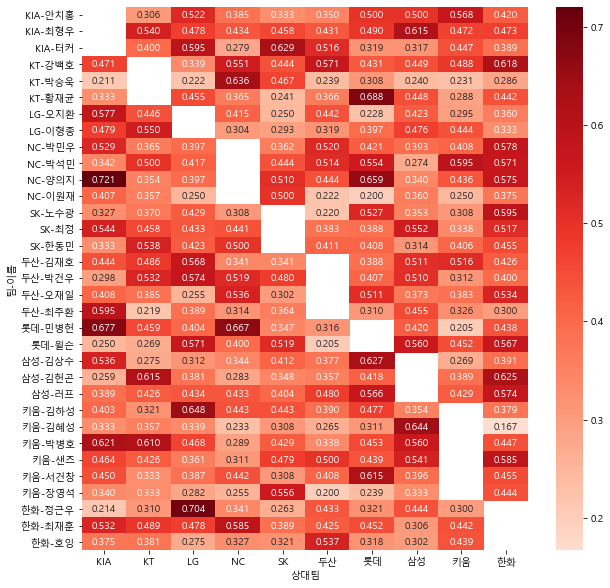

In [17]:
# 한번에 살펴보기 위해 히트맵으로 표시해보겠습니다. 

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

sns.heatmap(data = top_pivot, 
            annot = True, fmt = '.3f', 
            cmap = 'Reds',
            center= 0.4   # 컬러맵 중간값 지정
           )

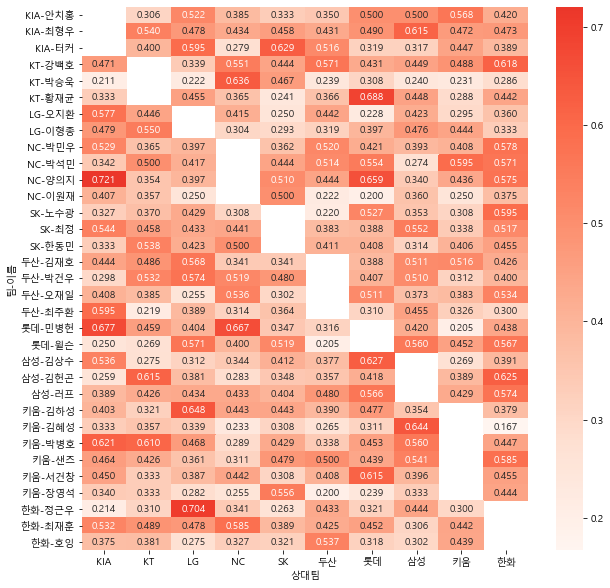

In [19]:
# 히트맵 사용시 center 옵션을 이용해 컬러맵의 기준(색상 변화의 중간이 되는 지점)을 변경할 수 있습니다. 
# center = 0.6 로 해서 표시할 경우,  지정하지 않은 경우 보다 빨간색으로 표시되는 부분이 적어집니다. 
# 상대적인 크기를 살펴보고자 할때  center를 변경하며 살펴볼 수 있습니다. 

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

sns.heatmap(data = top_pivot, 
            annot = True, fmt = '.3f', 
            cmap = 'Reds',
            center= 0.6   # 컬러맵 중간값 지정
           )